# FlavorFusion Analysis


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("data/interactions_train.csv")

# Drop random id columns
df.drop(['user_id','recipe_id'],axis=1,inplace=True)

# Rename mapped id columns
df.rename(columns={"u": "user_id","i":"recipe_id"},inplace=True)
df.insert(0, "user_id", df.pop("user_id"))
df.insert(1, "recipe_id", df.pop("recipe_id"))

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df

,user_id,recipe_id,date,rating
0,22095,44367,2000-02-25,5.0
1,22095,87844,2000-02-25,5.0
2,24732,138181,2000-03-13,5.0
3,24732,93054,2000-03-13,4.0
4,22095,101723,2000-04-07,5.0
...,...,...,...,...
698896,13681,141067,2018-12-18,5.0
698897,14897,99787,2018-12-18,5.0
698898,11605,76163,2018-12-18,5.0
698899,3604,29101,2018-12-18,5.0


<Axes: xlabel='rating', ylabel='count'>

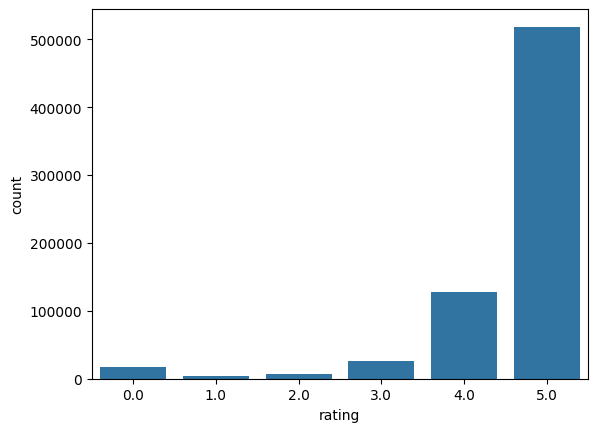

In [8]:
# Count by rating
sns.countplot(data=df, x='rating')

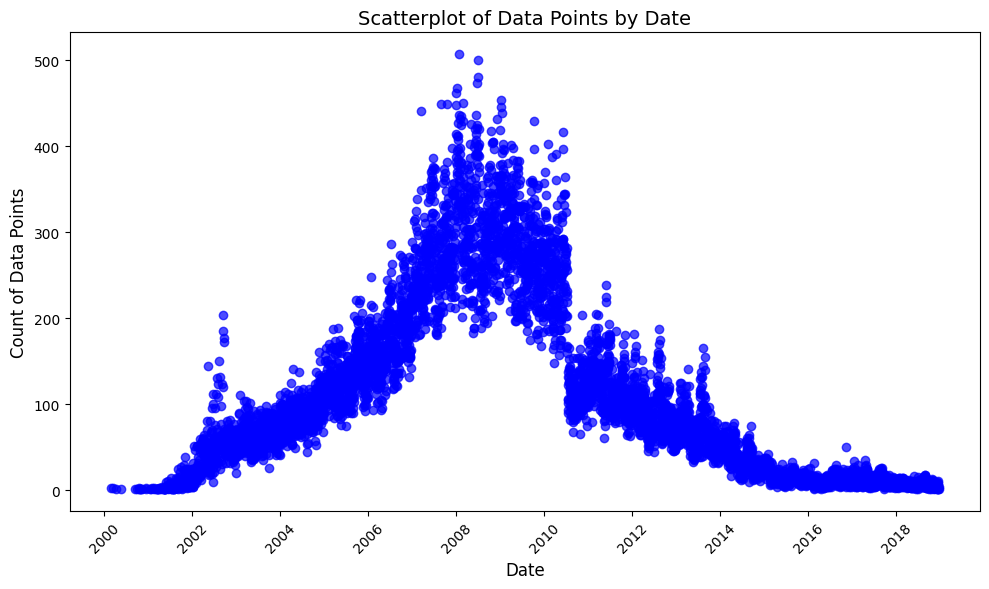

In [9]:
# Aggregate counts per date
date_counts = df.groupby('date').size().reset_index(name='count')

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(date_counts['date'], date_counts['count'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count of Data Points', fontsize=12)
plt.title('Scatterplot of Data Points by Date', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

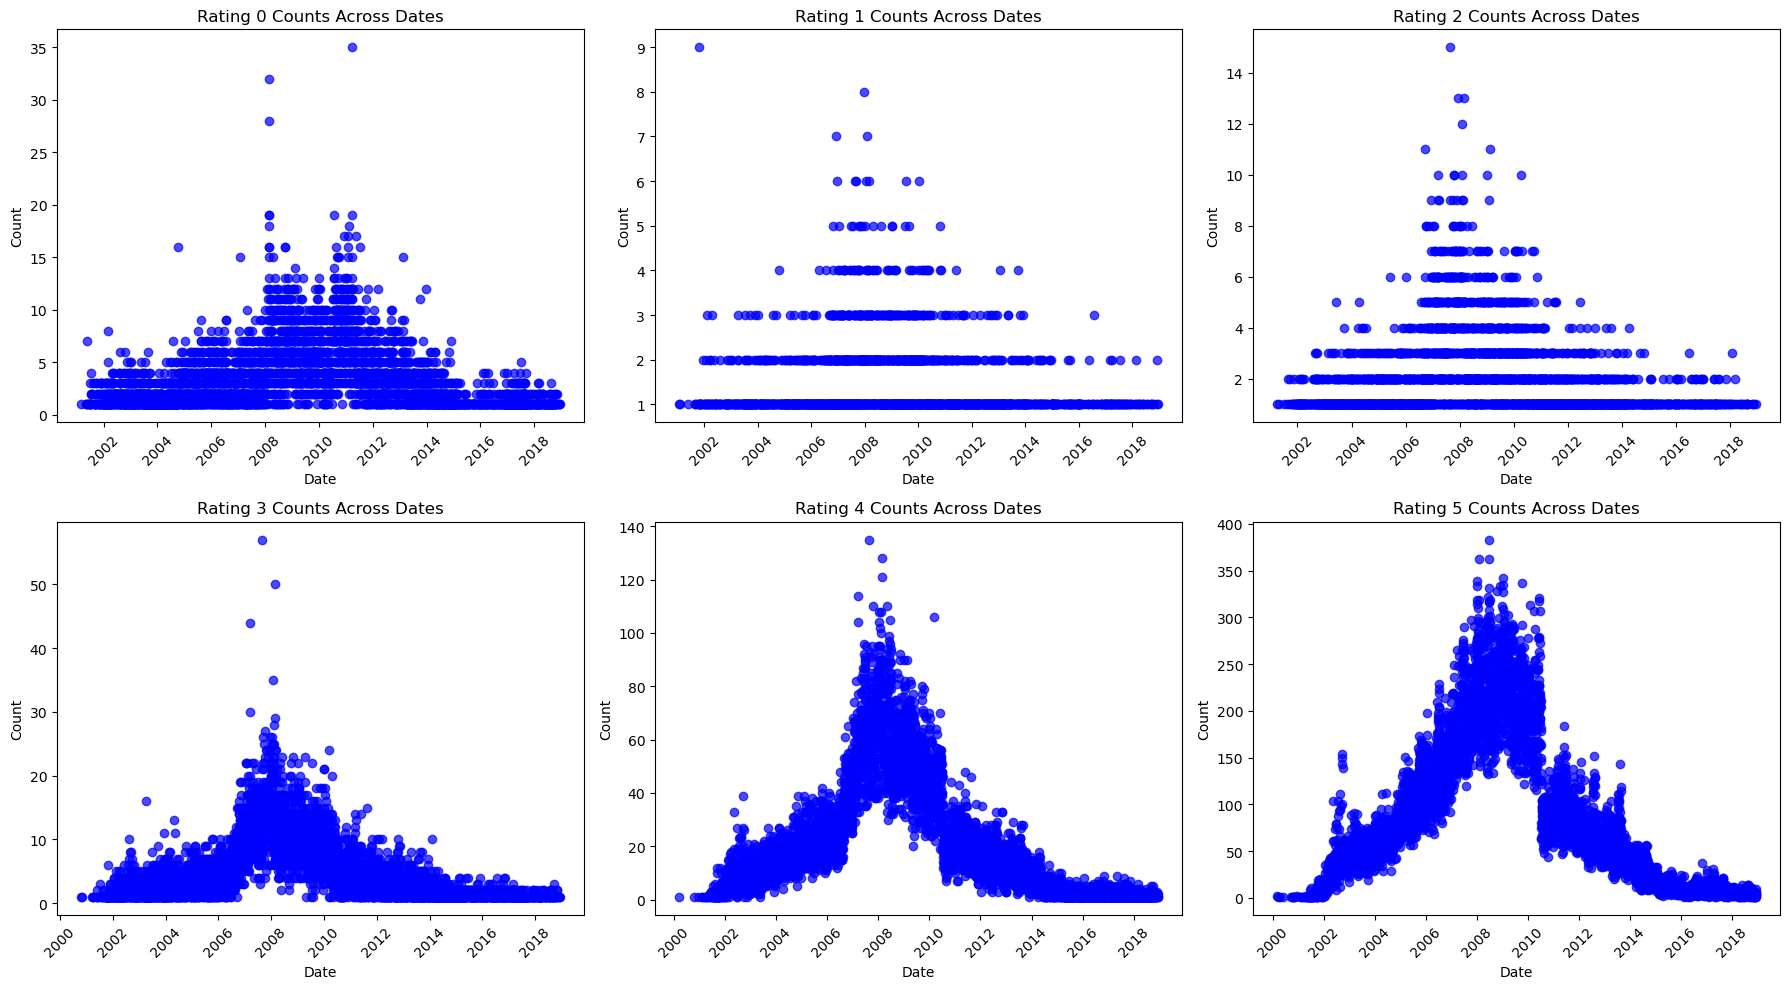

In [ ]:
# Create a figure with 6 subplots (one for each rating)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Loop over each rating (1 through 5)
for i, rating in enumerate(range(0, 6)):
    # Filter data for the current rating
    rating_data = df[df['rating'] == rating]

    # Aggregate counts per date for this rating
    date_counts = rating_data.groupby('date').size().reset_index(name='count')

    # Plot the scatterplot for the current rating
    axes[i].scatter(date_counts['date'], date_counts['count'], color='blue', alpha=0.7)
    axes[i].set_title(f'Rating {rating} Counts Across Dates')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Find users with ratings
user_ratings = df.groupby('user_id').size().reset_index(name='num_of_ratings')
user_ratings.sort_values(by='num_of_ratings',ascending=False,inplace=True)
user_ratings.head(10)

,user_id,num_of_ratings
94,94,6437
275,275,4581
193,193,3656
241,241,3465
208,208,3338
130,130,2851
564,564,2798
164,164,2733
319,319,2602
267,267,2457


In [ ]:
# Find recipes with ratings
user_ratings = df.groupby('recipe_id').size().reset_index(name='num_of_ratings')
avg_ratings_per_user = df.groupby('user_id')['rating'].mean().reset_index(name='avg_rating')
user_ratings.sort_values(by='num_of_ratings',ascending=False,inplace=True)
user_ratings.head(10)

,recipe_id,num_of_ratings
92964,99787,1091
124385,134610,1075
125573,135961,897
109379,117899,894
135622,147374,787
49197,52334,758
94796,101819,738
34912,37047,681
52998,56425,677
117674,127080,666


In [11]:
# Find average rating per user
avg_ratings_per_user = df.groupby('user_id')['rating'].mean().reset_index(name='avg_rating')
avg_ratings_per_user.head(10)

,user_id,avg_rating
0,0,4.806452
1,1,4.948718
2,2,4.222222
3,3,4.821547
4,4,4.388298
5,5,4.037931
6,6,5.000000
7,7,1.125000
8,8,4.551724
9,9,4.500000
